### Group 12 Project Proposal: 
**Bank Marketing Classification**

**Introduction**

*Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal:*

Phone-based direct marketing campaigns from a Portuguese banking institution asked clients questions about themselves (ex. Age, job, etc.). The result of the marketing campaign was 45211 responses from clients.

*Clearly state the question you will try to answer with your project:*

Based on the predictors, will a given person subscribe to a term deposit or not?

*Identify and describe the dataset that will be used to answer the question:*

We will be using  bank-additional.csv because it contains 4119 rows (compared to the full (41188 rows of the complete dataset). Using this dataset will cause the server to run smoother as well as avoid overplotting.  



**Preliminary Exploratory Data Analysis**

In [1]:
library(tidyverse)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [2]:
data <- read_csv2("https://drive.google.com/u/0/uc?id=1r8z-f85larbfItrABtwmpBeNK_TSDNO1&export=download")
head(data, 10)

Using ',' as decimal and '.' as grouping mark. Use read_delim() for more control.

Parsed with column specification:
cols(
  .default = col_character(),
  age = col_double(),
  duration = col_double(),
  campaign = col_double(),
  pdays = col_double(),
  previous = col_double(),
  emp.var.rate = col_number(),
  cons.price.idx = col_number(),
  cons.conf.idx = col_number(),
  nr.employed = col_number()
)

See spec(...) for full column specifications.



age,job,marital,education,default,housing,loan,contact,month,day_of_week,⋯,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,⋯,2,999,0,nonexistent,-18,92893,-462,1.313,50991,no
39,services,single,high.school,no,no,no,telephone,may,fri,⋯,4,999,0,nonexistent,11,93994,-364,4.855,5191,no
25,services,married,high.school,no,yes,no,telephone,jun,wed,⋯,1,999,0,nonexistent,14,94465,-418,4.962,52281,no
38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,⋯,3,999,0,nonexistent,14,94465,-418,4.959,52281,no
47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,⋯,1,999,0,nonexistent,-1,932,-42,4.191,51958,no
32,services,single,university.degree,no,no,no,cellular,sep,thu,⋯,3,999,2,failure,-11,94199,-375,0.884,49636,no
32,admin.,single,university.degree,no,yes,no,cellular,sep,mon,⋯,4,999,0,nonexistent,-11,94199,-375,0.879,49636,no
41,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,⋯,2,999,0,nonexistent,-1,932,-42,4.191,51958,no
31,services,divorced,professional.course,no,no,no,cellular,nov,tue,⋯,1,999,1,failure,-1,932,-42,4.153,51958,no


In [3]:
data <- mutate(data, subscription = y)
data <- select(data, "age", 'duration', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscription')
head(data, 10)

age,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscription
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
30,487,-18,92893,-462,1.313,50991,no
39,346,11,93994,-364,4.855,5191,no
25,227,14,94465,-418,4.962,52281,no
38,17,14,94465,-418,4.959,52281,no
47,58,-1,932,-42,4.191,51958,no
32,128,-11,94199,-375,0.884,49636,no
32,290,-11,94199,-375,0.879,49636,no
41,44,-1,932,-42,4.191,51958,no
31,68,-1,932,-42,4.153,51958,no


In [4]:
bank_split <- initial_split(data, prop = 0.50, strata = subscription)
bank_train <- training(bank_split)
bank_test <- testing(bank_split)

head(bank_train, 15) #3090x11
# bank_test 1029x11

age,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscription
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
47,58,-1,932,-42,4.191,51958,no
41,44,-1,932,-42,4.191,51958,no
29,553,-18,92893,-462,1.313,50991,no
27,698,14,93918,-427,4.963,52281,no
50,849,14,93918,-427,4.961,52281,yes
55,326,14,93918,-427,4.962,52281,no
29,626,14,93444,-361,4.967,52281,no
44,388,11,93994,-364,4.864,5191,no
36,446,11,93994,-364,4.856,5191,no


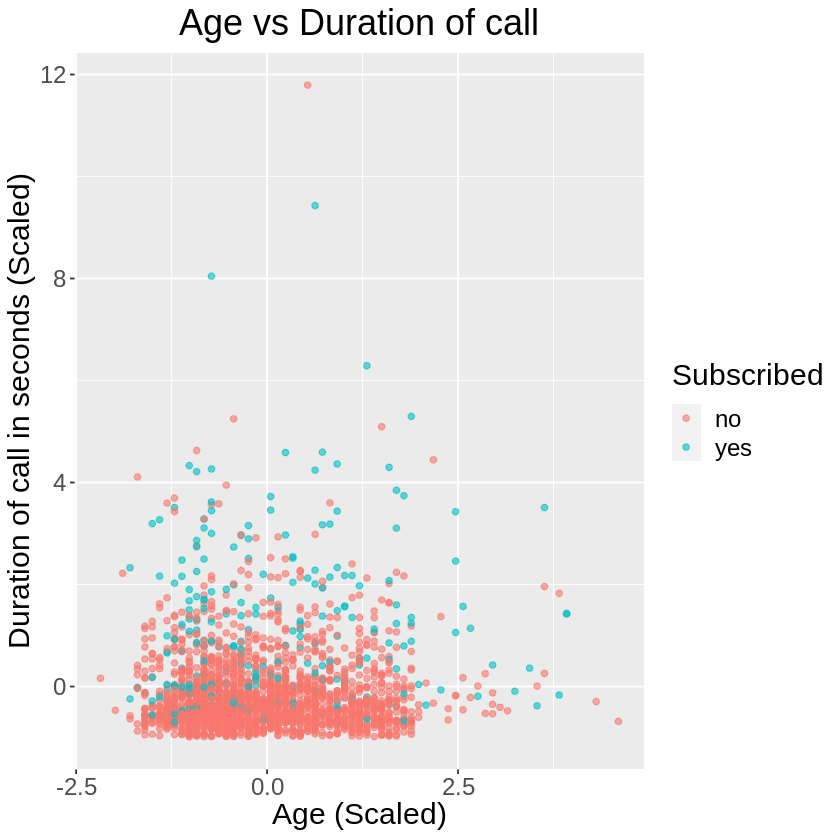

In [5]:
bank_recipe <- recipe(subscription ~ duration + age , data = bank_train) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors()) %>%
    prep()

scaled_bank <- bake(bank_recipe, bank_train)
ggplot(scaled_bank, aes(x=age, y=duration, color = subscription)) +
    geom_point(alpha=0.6) + 
    labs(x="Age (Scaled)", y= "Duration of call in seconds (Scaled)", color = "Subscribed") + 
    ggtitle("Age vs Duration of call") + 
    theme(text = element_text(size=18), plot.title = element_text(hjust = 0.5))

@@@

**Methods**

*Explain how you will conduct either your data analysis and which variables/columns you will use. Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?*

We will be using bank_addition.csv and **keeping** the following columns. We believe that these variables will influence the prediction the most and will greatly affect the predictor’s accuracy: 

* `age`: the age of the client
* `job`: the job type held (ex. admin, blue-collar, etc.)
* `marital status`: marital status
* `education`: level of education
* `default`: does the client have credit in default?
* `housing`: does the client have a housing loan?
* `loan`: does the client have a personal loan?
* `month`: month the client was contacted during
* `campaigns`: number of times this client was contacted for this campaign
* `poutcome`: outcome of the previous marketing campaign
* `y`: did the client sunscribe to a term deposit (categorical labels)

The following columns will be **omitted** when tidying our data. We believe that these variables are unnecessary in that they will have little to no effect on the prediction:

* `contact`: was the client contacted through a cellphone or telephone? 
* `day_of_week`: day of the week the client was last contacted on
* `duration`: duration of the last phone call, in seconds 
* `pdays`: number of days since the client was last contacted from a previous call
* `previous`: number of times this client was contacted before this campaign
* `emp.var.rate`: employment variation rate
* `cons.price.idx`: consumer price index
* `cons.conf.idx`: consumer confidence index
* `euribor3m`: euribor 3 month rate
* `nr.employed`: number of employees

*Describe at least one way that you will visualize the results:*

We will be creating a scatterplot that shows two different coloured groups in a way that we can see where our prediction is relative to the two groups (yes or no). 


**Expected Outcomes and Significance:**

*What do you expect to find?*

We expect to find that age, job, education, and marital status to have the greatest influence on the accuracy of the model. 

*What impact could such findings have?*

Our findings could be useful for advertising purposes, where companies would cater to a particular demographic if they knew that they would be the most likely to subscribe to a term deposit. 

*What future questions could this lead to?*

Why do these variables influence whether or not someone subscribes to a term deposit in the first place? 
